## Problem Statement

The goal of this project is to perform an exploratory data analysis (EDA) on real-world aircraft incident and crash data to uncover key insights related to aviation safety.
By analyzing factors such as incident dates, aircraft models, manufacturers, number of deaths, and accident details, this analysis aims to:

Identify trends and patterns in aircraft accidents over time

Determine which aircraft types and manufacturers are most frequently involved

Explore the severity and causes of incidents

Assist in developing insights that could contribute to improved aviation safety protocols and preventive measures

This EDA project explores real aviation incident data to discover trends, high-risk models, and common patterns in accident causes and fatalities.

### Import Libraries

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### Step 1: Understand the Problem & Dataset

#### Aircraft Crashes
This dataset contains historical records of aircraft crash incidents, including the date of the incident, number of deaths, aircraft type, flight name, and a brief description of each accident.

In [120]:
Aircraft_Crashes= pd.read_csv('Aircraft_Crashes.csv', encoding = 'unicode_escape')

In [121]:
Aircraft_Crashes

,Number_of_deaths,Incident_Date,Flight_name,Aircraft_type,Accident_details
0,279.0,"June 12, 2025",Air India Flight 171,Boeing 787-8 Dreamliner,"Air India Flight 171 flying from Ahmedabad, In..."
1,257.0,"April 11, 2018",Algerian Air Force transport aircraft,Ilyushin Il-76,Algerian Air Force transport aircraft crashed ...
2,224.0,"October 31, 2015",Metrojet Flight 9268,Airbus A321-231,Metrojet Flight 9268 crashed in the Sinai Peni...
3,298.0,"July 17, 2014",Malaysia Airlines Flight 17,Boeing 777-200ER,Malaysia Airlines Flight 17 flying from Amster...
4,239.0,"March 8, 2014",Malaysia Airlines Flight 370,Boeing 777-200ER,Malaysia Airlines Flight 370 flying from Kuala...
5,228.0,"June 1, 2009",Air France Flight 447,Airbus A330-203,"Air France Flight 447 carrying 228 occupants, ..."
6,275.0,"February 19, 2003",Iranian military aircraft,Ilyushin Il-76,An Iranian military Ilyushin Il-76 crashed in ...
7,225.0,"May 25, 2002",China Airlines Flight 611,Boeing 747-209B,China Airlines Flight 611 bound for Hong Kong ...
8,265.0,"November 12, 2001",American Airlines Flight 587,Airbus A300,American Airlines Flight 587 crashed in the Be...
9,217.0,"October 31, 1999",EgyptAir Flight 990,Boeing 767-366ER,EgyptAir Flight 990 flying from Los Angeles In...


In [122]:
Aircraft_Crashes.shape

(32, 5)

In [123]:
Aircraft_Crashes.size

160

In [124]:
Aircraft_Crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number_of_deaths  31 non-null     float64
 1   Incident_Date     31 non-null     object 
 2   Flight_name       32 non-null     object 
 3   Aircraft_type     31 non-null     object 
 4   Accident_details  31 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.4+ KB


In [125]:
Aircraft_Crashes.describe()

,Number_of_deaths
count,31.000000
mean,256.709677
std,39.075306
min,200.000000
25%,227.500000
50%,257.000000
75%,274.000000
max,349.000000


#### Aircraft_type_list
This dataset provides technical and operational details of various aircraft models, including manufacturer, aircraft type, country of origin, seating capacity, range, number built, and key milestone dates like first flight and entry into service. It can be used to enrich crash analysis by linking aircraft specifications with incident records.

In [126]:
Aircraft_type_list = pd.read_csv('Aircraft_type_list.csv', encoding = 'unicode_escape')

In [127]:
Aircraft_type_list

,Model,Manufacturer,Type,Country,First_Flight,Entry_into_Service,Seats,Range_Km,Number_Built
0,Boeing 787-8 Dreamliner,Boeing,Wide-body jet,USA,15-12-2009,26-10-2011,242,"13,530 km","1,072"
1,Ilyushin Il-76,Ilyushin,Cargo,Russia,25-03-1971,1974,NaN,"4,2005,000 km",960+
2,Airbus A321-231,Airbus,Narrow-body jet,Multinational,11-03-1993,1994,185,"5,950 km","2,500+"
3,Boeing 777-200ER,Boeing,Wide-body jet,USA,07-10-1996,1997,314,"14,305 km",422
4,Airbus A330-203,Airbus,Wide-body jet,Multinational,1997,1998,293,"13,430 km","1,800+"
5,Boeing 747-209B,Boeing,Wide-body jet,USA,1978,1979,366,"13,450 km","1,500+"
6,Airbus A300,Airbus,Wide-body jet,France/Germany,28-10-1972,23-05-1974,247,"7,500 km",561
7,Boeing 767-366ER,Boeing,Wide-body jet,USA,1981,1982,261,"11,070 km",583
8,McDonnell Douglas MD-11,McDonnell Douglas,Wide-body trijet,USA,1990,1990,293,"12,455 km",200
9,Airbus A300B4-622R,Airbus,Wide-body jet,France/Germany,1984,1985,266,"7,540 km",249


In [128]:
Aircraft_type_list.size

252

In [129]:
Aircraft_type_list.shape

(28, 9)

In [130]:
Aircraft_type_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Model               28 non-null     object
 1   Manufacturer        28 non-null     object
 2   Type                28 non-null     object
 3   Country             28 non-null     object
 4   First_Flight        27 non-null     object
 5   Entry_into_Service  27 non-null     object
 6   Seats               27 non-null     object
 7   Range_Km            28 non-null     object
 8   Number_Built        28 non-null     object
dtypes: object(9)
memory usage: 2.1+ KB


In [131]:
Aircraft_type_list.describe()

,Model,Manufacturer,Type,Country,First_Flight,Entry_into_Service,Seats,Range_Km,Number_Built
count,28,28,28,28,27,27,27,28,28
unique,28,9,6,7,19,18,15,23,27
top,Boeing 787-8 Dreamliner,Boeing,Wide-body jet,USA,1970,1972,366,Varies,30+
freq,1,11,16,18,4,5,7,2,2


#### ICAO_aircraft_type_designators
This dataset contains standardized ICAO and IATA aircraft type designators along with their corresponding aircraft names. It serves as a reference for identifying and mapping aircraft across aviation databases using globally recognized codes — useful for data integration and classification tasks in aircraft analysis.`m

In [132]:
ICAO_aircraft_type_designators = pd.read_csv('ICAO_aircraft_type_designators.csv', encoding = 'unicode_escape')
ICAO_aircraft_type_designators.head()

,ICAO,IATA_type_code,Aircraft_type,Unnamed: 3
0,A124,A4F,Antonov An-124 Ruslan,"('A124' ,'A4F','Antonov An-124 Ruslan'),"
1,A140,A40,Antonov An-140,"('A140' ,'A40','Antonov An-140'),"
2,A148,A81,Antonov An-148,"('A148' ,'A81','Antonov An-148'),"
3,A158,A58,Antonov An-158,"('A158' ,'A58','Antonov An-158'),"
4,A19N,31N,Airbus A319neo,"('A19N' ,'31N','Airbus A319neo'),"


In [133]:
ICAO_aircraft_type_designators

,ICAO,IATA_type_code,Aircraft_type,Unnamed: 3
0,A124,A4F,Antonov An-124 Ruslan,"('A124' ,'A4F','Antonov An-124 Ruslan'),"
1,A140,A40,Antonov An-140,"('A140' ,'A40','Antonov An-140'),"
2,A148,A81,Antonov An-148,"('A148' ,'A81','Antonov An-148'),"
3,A158,A58,Antonov An-158,"('A158' ,'A58','Antonov An-158'),"
4,A19N,31N,Airbus A319neo,"('A19N' ,'31N','Airbus A319neo'),"
...,...,...,...,...
270,WW24,WWP,Israel Aircraft Industries 1124 Westwind,"('WW24' ,'WWP','Israel Aircraft Industries 112..."
271,Y12,YN2,Harbin Y-12,"('Y12' ,'YN2','Harbin Y-12'),"
272,YK40,YK4,Yakovlev Yak-40,"('YK40' ,'YK4','Yakovlev Yak-40'),"
273,YK42,YK2,Yakovlev Yak-42,"('YK42' ,'YK2','Yakovlev Yak-42'),"


In [134]:
ICAO_aircraft_type_designators.head()

,ICAO,IATA_type_code,Aircraft_type,Unnamed: 3
0,A124,A4F,Antonov An-124 Ruslan,"('A124' ,'A4F','Antonov An-124 Ruslan'),"
1,A140,A40,Antonov An-140,"('A140' ,'A40','Antonov An-140'),"
2,A148,A81,Antonov An-148,"('A148' ,'A81','Antonov An-148'),"
3,A158,A58,Antonov An-158,"('A158' ,'A58','Antonov An-158'),"
4,A19N,31N,Airbus A319neo,"('A19N' ,'31N','Airbus A319neo'),"


In [135]:
ICAO_aircraft_type_designators.size

1100

In [136]:
ICAO_aircraft_type_designators.shape

(275, 4)

In [137]:
ICAO_aircraft_type_designators.describe()

,ICAO,IATA_type_code,Aircraft_type,Unnamed: 3
count,275,269,275,275
unique,235,240,275,275
top,DC10,CNJ,Antonov An-124 Ruslan,"('A124' ,'A4F','Antonov An-124 Ruslan'),"
freq,5,14,1,1


In [138]:
ICAO_aircraft_type_designators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ICAO            275 non-null    object
 1   IATA_type_code  269 non-null    object
 2   Aircraft_type   275 non-null    object
 3   Unnamed: 3      275 non-null    object
dtypes: object(4)
memory usage: 8.7+ KB


After exploring all three datasets, we observed that they contain some missing values, as confirmed by the info() method. To ensure reliable analysis, we will handle these missing values appropriately.
Additionally, the __ICAO_aircraft_type_designators__ dataset contains an unnecessary column (Unnamed: 3) which we'll remove as part of the data cleaning process.

## Step 2: Data Cleaning

As observed, all three datasets are currently uncleaned and contain issues such as missing values, inconsistent formats, and unnecessary columns. In the next step, we will clean each dataset to ensure the data is accurate, consistent, and ready for analysis.



__1. Check for missing values__

In [139]:
# Check missing values in Aircraft_Crashes dataset
Aircraft_Crashes.isnull().sum()

Number_of_deaths    1
Incident_Date       1
Flight_name         0
Aircraft_type       1
Accident_details    1
dtype: int64

In [140]:
Aircraft_Crashes[Aircraft_Crashes.isnull().any(axis = 1)]

,Number_of_deaths,Incident_Date,Flight_name,Aircraft_type,Accident_details
15,NaN,NaN,Kazakhstan Airlines Flight 1907,NaN,NaN


In [141]:
# Check missing values in Aircraft_type_list dataset
Aircraft_type_list.isnull().sum()

Model                 0
Manufacturer          0
Type                  0
Country               0
First_Flight          1
Entry_into_Service    1
Seats                 1
Range_Km              0
Number_Built          0
dtype: int64

In [142]:
Aircraft_type_list[Aircraft_type_list.isnull().any(axis = 1)]

,Model,Manufacturer,Type,Country,First_Flight,Entry_into_Service,Seats,Range_Km,Number_Built
1,Ilyushin Il-76,Ilyushin,Cargo,Russia,25-03-1971,1974,NaN,"4,2005,000 km",960+
12,Boeing 747 / Russian Ilyushin Il-76,Boeing/Ilyushin,Mixed Use,USA/Russia,NaN,NaN,Mixed,Varies,Mixed


In [143]:
# Check missing values in ICAO_aircraft_type_designators dataset
ICAO_aircraft_type_designators.isnull().sum()

ICAO              0
IATA_type_code    6
Aircraft_type     0
Unnamed: 3        0
dtype: int64

In [144]:
ICAO_aircraft_type_designators[ICAO_aircraft_type_designators.isnull().any(axis = 1 )]

,ICAO,IATA_type_code,Aircraft_type,Unnamed: 3
36,A400,NaN,Airbus A400M Atlas,"('A400' ,'','Airbus A400M Atlas'),"
63,B52,NaN,Boeing B-52 Stratofortress,"('B52' ,'N/A','Boeing B-52 Stratofortress'),"
128,BE99,NaN,Beechcraft Model 99,"('BE99' ,'','Beechcraft Model 99'),"
138,C5M,NaN,Lockheed C-5M Super Galaxy,"('C5M' ,'N/A','Lockheed C-5M Super Galaxy'),"
200,EA50,NaN,Eclipse 500,"('EA50' ,'','Eclipse 500'),"
220,GA7C,NaN,Gulfstream G700,"('GA7C' ,'','Gulfstream G700'),"


__2. Handle incorrect data, missing values, inconsistent formats/`Fix formatting issues, and unnecessary columns__ 



i. Handling Missing Values in __Aircraft_Crashes__ Dataset

In [145]:
Aircraft_Crashes[Aircraft_Crashes.isnull().any(axis=1)]

,Number_of_deaths,Incident_Date,Flight_name,Aircraft_type,Accident_details
15,NaN,NaN,Kazakhstan Airlines Flight 1907,NaN,NaN


It is better to drop the above row, as it contains only the Flight_name while all other key information is missing. Since this dataset is based on real incidents, we cannot make assumptions to impute critical values like the number of deaths or incident date. Moreover, removing this single row will not significantly impact the overall analysis.

In [146]:
# Drop row with NaN
# dropna -- will drop all rows that contain at least one NaN value in any column.
Aircraft_Crashes = Aircraft_Crashes.dropna()

In [147]:
# Check Null values again 
Aircraft_Crashes.isnull().sum()

Number_of_deaths    0
Incident_Date       0
Flight_name         0
Aircraft_type       0
Accident_details    0
dtype: int64

In [148]:
Aircraft_Crashes.shape

(31, 5)

In [149]:
Aircraft_Crashes.head()

,Number_of_deaths,Incident_Date,Flight_name,Aircraft_type,Accident_details
0,279.0,"June 12, 2025",Air India Flight 171,Boeing 787-8 Dreamliner,"Air India Flight 171 flying from Ahmedabad, In..."
1,257.0,"April 11, 2018",Algerian Air Force transport aircraft,Ilyushin Il-76,Algerian Air Force transport aircraft crashed ...
2,224.0,"October 31, 2015",Metrojet Flight 9268,Airbus A321-231,Metrojet Flight 9268 crashed in the Sinai Peni...
3,298.0,"July 17, 2014",Malaysia Airlines Flight 17,Boeing 777-200ER,Malaysia Airlines Flight 17 flying from Amster...
4,239.0,"March 8, 2014",Malaysia Airlines Flight 370,Boeing 777-200ER,Malaysia Airlines Flight 370 flying from Kuala...


Missing values are handled. Now Incident_Date column appears to be a string , Convert Dates to Datetime Format

In [150]:
Aircraft_Crashes.loc[:, 'Incident_Date'] = pd.to_datetime(Aircraft_Crashes['Incident_Date'], errors='coerce')

.loc[:, 'column_name'] tells Pandas that we are modifying the original DataFrame safely — not just a view.

In [151]:
Aircraft_Crashes.head()

,Number_of_deaths,Incident_Date,Flight_name,Aircraft_type,Accident_details
0,279.0,2025-06-12 00:00:00,Air India Flight 171,Boeing 787-8 Dreamliner,"Air India Flight 171 flying from Ahmedabad, In..."
1,257.0,2018-04-11 00:00:00,Algerian Air Force transport aircraft,Ilyushin Il-76,Algerian Air Force transport aircraft crashed ...
2,224.0,2015-10-31 00:00:00,Metrojet Flight 9268,Airbus A321-231,Metrojet Flight 9268 crashed in the Sinai Peni...
3,298.0,2014-07-17 00:00:00,Malaysia Airlines Flight 17,Boeing 777-200ER,Malaysia Airlines Flight 17 flying from Amster...
4,239.0,2014-03-08 00:00:00,Malaysia Airlines Flight 370,Boeing 777-200ER,Malaysia Airlines Flight 370 flying from Kuala...


So here we handled inconsistent format of Incident_Date, now just check other columns as well like string if they have any white spaces and duplicates also we can check 

In [152]:
# Check duplicate records 
Aircraft_Crashes.duplicated().sum()

0

Now Check for Whitespace / Inconsistent Capitalization which applies to text columns like Flight_name, Aircraft_type, and Accident_details:

In [153]:
Aircraft_Crashes.loc[:,'Flight_name'] = Aircraft_Crashes['Flight_name'].str.strip().str.title()

In [154]:
Aircraft_Crashes.loc[:,'Aircraft_type'] = Aircraft_Crashes['Aircraft_type'].str.strip()

In [155]:
Aircraft_Crashes.head()

,Number_of_deaths,Incident_Date,Flight_name,Aircraft_type,Accident_details
0,279.0,2025-06-12 00:00:00,Air India Flight 171,Boeing 787-8 Dreamliner,"Air India Flight 171 flying from Ahmedabad, In..."
1,257.0,2018-04-11 00:00:00,Algerian Air Force Transport Aircraft,Ilyushin Il-76,Algerian Air Force transport aircraft crashed ...
2,224.0,2015-10-31 00:00:00,Metrojet Flight 9268,Airbus A321-231,Metrojet Flight 9268 crashed in the Sinai Peni...
3,298.0,2014-07-17 00:00:00,Malaysia Airlines Flight 17,Boeing 777-200ER,Malaysia Airlines Flight 17 flying from Amster...
4,239.0,2014-03-08 00:00:00,Malaysia Airlines Flight 370,Boeing 777-200ER,Malaysia Airlines Flight 370 flying from Kuala...


##### To ensure high-quality analysis, the Aircraft_Crashes dataset cleaned now, through the following steps:
-    Handling Missing Values
-    Datetime Conversion
-    Duplicate checks
-    Text Standardization
  

ii. Handling Missing Values in __Aircraft_type_list__ Dataset

In [156]:
# Aircraft_type_list -- incase want to see complete data
Aircraft_type_list.head()

,Model,Manufacturer,Type,Country,First_Flight,Entry_into_Service,Seats,Range_Km,Number_Built
0,Boeing 787-8 Dreamliner,Boeing,Wide-body jet,USA,15-12-2009,26-10-2011,242,"13,530 km","1,072"
1,Ilyushin Il-76,Ilyushin,Cargo,Russia,25-03-1971,1974,NaN,"4,2005,000 km",960+
2,Airbus A321-231,Airbus,Narrow-body jet,Multinational,11-03-1993,1994,185,"5,950 km","2,500+"
3,Boeing 777-200ER,Boeing,Wide-body jet,USA,07-10-1996,1997,314,"14,305 km",422
4,Airbus A330-203,Airbus,Wide-body jet,Multinational,1997,1998,293,"13,430 km","1,800+"


In [157]:
Aircraft_type_list[Aircraft_type_list.isnull().any(axis = 1)]

,Model,Manufacturer,Type,Country,First_Flight,Entry_into_Service,Seats,Range_Km,Number_Built
1,Ilyushin Il-76,Ilyushin,Cargo,Russia,25-03-1971,1974,NaN,"4,2005,000 km",960+
12,Boeing 747 / Russian Ilyushin Il-76,Boeing/Ilyushin,Mixed Use,USA/Russia,NaN,NaN,Mixed,Varies,Mixed


In [158]:
# Check most used value in Seats and impute the value
Aircraft_type_list['Seats'].value_counts().head(1)

Seats
366    7
Name: count, dtype: int64

In [159]:
Aircraft_type_list['Seats'] = Aircraft_type_list['Seats'].fillna(Aircraft_type_list['Seats'].mode()[0])

In [160]:
Aircraft_type_list[(Aircraft_type_list['Manufacturer'] == 'Ilyushin') & (Aircraft_type_list['Country'] == 'Russia')]

,Model,Manufacturer,Type,Country,First_Flight,Entry_into_Service,Seats,Range_Km,Number_Built
1,Ilyushin Il-76,Ilyushin,Cargo,Russia,25-03-1971,1974,366,"4,2005,000 km",960+


Seat No filled with most used value

In [161]:
Aircraft_type_list[Aircraft_type_list.isnull().any(axis = 1)]

,Model,Manufacturer,Type,Country,First_Flight,Entry_into_Service,Seats,Range_Km,Number_Built
12,Boeing 747 / Russian Ilyushin Il-76,Boeing/Ilyushin,Mixed Use,USA/Russia,NaN,NaN,Mixed,Varies,Mixed


As we could see above Aircraft_type_list dataset is essentially two aircraft records merged into one row (Boeing 747 and Ilyushin Il-76), which should ideally be separated into two rows for clean and accurate analysis. So let's sepearte out them.

In [162]:
# Check original row
original_row = Aircraft_type_list.loc[12]
original_row

Model                 Boeing 747 / Russian Ilyushin Il-76
Manufacturer                              Boeing/Ilyushin
Type                                            Mixed Use
Country                                        USA/Russia
First_Flight                                          NaN
Entry_into_Service                                    NaN
Seats                                               Mixed
Range_Km                                           Varies
Number_Built                                        Mixed
Name: 12, dtype: object

In [163]:
# Seperate row for Boeing
row_Boeing  = original_row.copy()
row_Boeing['Manufacturer'] = 'Boeing'
row_Boeing['Country'] = 'USA'
row_Boeing['Model'] = 'Boeing 747'
row_Boeing['First_Flight'] = '09-02-1969'
row_Boeing['Entry_into_Service'] = '22-01-1970'

In [164]:
# Seperate row for Ilyushin
row_Ilyushin   = original_row.copy()
row_Ilyushin['Manufacturer'] = 'Ilyushin'
row_Ilyushin['Country'] = 'Russia'
row_Ilyushin['Model'] = 'Russian Ilyushin Il-76'
row_Ilyushin['First_Flight'] = '25-03-1971'
row_Ilyushin['Entry_into_Service'] = '01-06-1974'

In [165]:
# Drop Original row 
Aircraft_type_list = Aircraft_type_list.drop(index=12)

In [166]:
# Append both cleaned rows
Aircraft_type_list = pd.concat([Aircraft_type_list,pd.DataFrame([row_Boeing, row_Ilyushin])],ignore_index=True)

In [167]:
Aircraft_type_list[Aircraft_type_list.isnull().any(axis = 1)]

,Model,Manufacturer,Type,Country,First_Flight,Entry_into_Service,Seats,Range_Km,Number_Built


In [168]:
Aircraft_type_list[(Aircraft_type_list['Seats'] == 'Mixed')]

,Model,Manufacturer,Type,Country,First_Flight,Entry_into_Service,Seats,Range_Km,Number_Built
27,Boeing 747,Boeing,Mixed Use,USA,09-02-1969,22-01-1970,Mixed,Varies,Mixed
28,Russian Ilyushin Il-76,Ilyushin,Mixed Use,Russia,25-03-1971,01-06-1974,Mixed,Varies,Mixed


In [169]:
Aircraft_type_list.shape

(29, 9)

In [170]:
Aircraft_type_list.isnull().sum()

Model                 0
Manufacturer          0
Type                  0
Country               0
First_Flight          0
Entry_into_Service    0
Seats                 0
Range_Km              0
Number_Built          0
dtype: int64

In [171]:
Aircraft_type_list.head()

,Model,Manufacturer,Type,Country,First_Flight,Entry_into_Service,Seats,Range_Km,Number_Built
0,Boeing 787-8 Dreamliner,Boeing,Wide-body jet,USA,15-12-2009,26-10-2011,242,"13,530 km","1,072"
1,Ilyushin Il-76,Ilyushin,Cargo,Russia,25-03-1971,1974,366,"4,2005,000 km",960+
2,Airbus A321-231,Airbus,Narrow-body jet,Multinational,11-03-1993,1994,185,"5,950 km","2,500+"
3,Boeing 777-200ER,Boeing,Wide-body jet,USA,07-10-1996,1997,314,"14,305 km",422
4,Airbus A330-203,Airbus,Wide-body jet,Multinational,1997,1998,293,"13,430 km","1,800+"


#### Further Cleaning Required – Aircraft_type_list Dataset
Although missing values in the Aircraft_type_list dataset were handled, additional data cleaning is required to ensure consistency and usability in analysis. Below are the key observations:

Inconsistent Numeric Formats:
Columns like Range_Km and Seats contain values such as "5,375–7,500 km" or "Mixed", which are non-numeric and require cleaning.
These need to be standardized — either by extracting the average or maximum numeric value, or converting them to NaN for further imputation.

Unwanted Symbols:
The Number_Built column contains entries with symbols like "+" (e.g., "1,000+"), which are not suitable for numeric operations.
These should be cleaned by removing the symbol and converting the values to integers if possible.

Text in Numeric Columns:
Some numeric columns contain non-numeric strings like "Varies", "Mixed", etc. These should be:
Replaced with NaN if actual values cannot be determined, or
Handled with researched values where applicable.



In [172]:
Aircraft_type_list['Seats'].unique()

array(['242', '366', '185', '314', '293', '247', '261', '266', '42',
       '259', '280', '180', '250', '270', 'Mixed'], dtype=object)

In [173]:
# find rows where seat not a no. 
non_numeric_seats = Aircraft_type_list[~Aircraft_type_list['Seats'].str.isnumeric()]
non_numeric_seats

,Model,Manufacturer,Type,Country,First_Flight,Entry_into_Service,Seats,Range_Km,Number_Built
27,Boeing 747,Boeing,Mixed Use,USA,09-02-1969,22-01-1970,Mixed,Varies,Mixed
28,Russian Ilyushin Il-76,Ilyushin,Mixed Use,Russia,25-03-1971,01-06-1974,Mixed,Varies,Mixed


Replace these values with mode (most frequent seat value)

In [174]:
mode_value = Aircraft_type_list['Seats'][Aircraft_type_list['Seats'].str.isnumeric()].mode()[0]

Aircraft_type_list['Seats'] = Aircraft_type_list['Seats'].apply(lambda x: mode_value if not str(x).isnumeric() else x )


In [175]:
Aircraft_type_list.drop(index = 1 )

,Model,Manufacturer,Type,Country,First_Flight,Entry_into_Service,Seats,Range_Km,Number_Built
0,Boeing 787-8 Dreamliner,Boeing,Wide-body jet,USA,15-12-2009,26-10-2011,242,"13,530 km","1,072"
2,Airbus A321-231,Airbus,Narrow-body jet,Multinational,11-03-1993,1994,185,"5,950 km","2,500+"
3,Boeing 777-200ER,Boeing,Wide-body jet,USA,07-10-1996,1997,314,"14,305 km",422
4,Airbus A330-203,Airbus,Wide-body jet,Multinational,1997,1998,293,"13,430 km","1,800+"
5,Boeing 747-209B,Boeing,Wide-body jet,USA,1978,1979,366,"13,450 km","1,500+"
6,Airbus A300,Airbus,Wide-body jet,France/Germany,28-10-1972,23-05-1974,247,"7,500 km",561
7,Boeing 767-366ER,Boeing,Wide-body jet,USA,1981,1982,261,"11,070 km",583
8,McDonnell Douglas MD-11,McDonnell Douglas,Wide-body trijet,USA,1990,1990,293,"12,455 km",200
9,Airbus A300B4-622R,Airbus,Wide-body jet,France/Germany,1984,1985,266,"7,540 km",249
10,Airbus A300B4-220,Airbus,Wide-body jet,France/Germany,1978,1979,266,"6,850 km",248


In [176]:
Aircraft_type_list[(Aircraft_type_list['First_Flight'].isin(['09-02-1969','25-03-1971'])) & (Aircraft_type_list['Entry_into_Service'].isin(['22-01-1970','01-06-1974']))]

,Model,Manufacturer,Type,Country,First_Flight,Entry_into_Service,Seats,Range_Km,Number_Built
27,Boeing 747,Boeing,Mixed Use,USA,09-02-1969,22-01-1970,366,Varies,Mixed
28,Russian Ilyushin Il-76,Ilyushin,Mixed Use,Russia,25-03-1971,01-06-1974,366,Varies,Mixed


In [177]:
# find rows where Range_Km and Number_Built not a no. 
non_numeric = Aircraft_type_list[(~Aircraft_type_list['Range_Km'].str.isnumeric()) & (~Aircraft_type_list['Number_Built'].str.isnumeric())]
non_numeric

,Model,Manufacturer,Type,Country,First_Flight,Entry_into_Service,Seats,Range_Km,Number_Built
0,Boeing 787-8 Dreamliner,Boeing,Wide-body jet,USA,15-12-2009,26-10-2011,242,"13,530 km","1,072"
1,Ilyushin Il-76,Ilyushin,Cargo,Russia,25-03-1971,1974,366,"4,2005,000 km",960+
2,Airbus A321-231,Airbus,Narrow-body jet,Multinational,11-03-1993,1994,185,"5,950 km","2,500+"
4,Airbus A330-203,Airbus,Wide-body jet,Multinational,1997,1998,293,"13,430 km","1,800+"
5,Boeing 747-209B,Boeing,Wide-body jet,USA,1978,1979,366,"13,450 km","1,500+"
13,Antonov An-32B,Antonov,Turboprop transport,Ukraine,1976,1984,42,"2,500 km",360+
15,Boeing 767-3Z9ER,Boeing,Wide-body jet,USA,1988,1989,261,"11,070 km",Unknown
16,Boeing 747-121,Boeing,Wide-body jet,USA,1969,1970,366,"9,800 km",30+
17,Airbus A300-200,Airbus,Wide-body jet,France/Germany,1972,1974,280,"5,3757,500 km",250+
19,Tupolev Tu-154B-2,Tupolev,Narrow-body jet,USSR,1971,1972,180,"5,280 km",450+


In [178]:
Aircraft_type_list.head()

,Model,Manufacturer,Type,Country,First_Flight,Entry_into_Service,Seats,Range_Km,Number_Built
0,Boeing 787-8 Dreamliner,Boeing,Wide-body jet,USA,15-12-2009,26-10-2011,242,"13,530 km","1,072"
1,Ilyushin Il-76,Ilyushin,Cargo,Russia,25-03-1971,1974,366,"4,2005,000 km",960+
2,Airbus A321-231,Airbus,Narrow-body jet,Multinational,11-03-1993,1994,185,"5,950 km","2,500+"
3,Boeing 777-200ER,Boeing,Wide-body jet,USA,07-10-1996,1997,314,"14,305 km",422
4,Airbus A330-203,Airbus,Wide-body jet,Multinational,1997,1998,293,"13,430 km","1,800+"


In [179]:
# remove + sign 
Aircraft_type_list['Number_Built'] = Aircraft_type_list['Number_Built'].str.replace(r'\+$','', regex = True )
# r-- The r before the string tells Python to treat it as a raw string.

In [180]:
# remove , sign 
Aircraft_type_list['Number_Built'] = Aircraft_type_list['Number_Built'].str.replace(r',','', regex = True )

In [181]:
Aircraft_type_list['Number_Built'].head()

0    1072
1     960
2    2500
3     422
4    1800
Name: Number_Built, dtype: object

###### Remove unwanted symbols/sign from range

In [182]:
Aircraft_type_list['Range_Km'] = Aircraft_type_list['Range_Km'].str.replace(',','',regex = True)

In [183]:
Aircraft_type_list['Range_Km'] = Aircraft_type_list['Range_Km'].str.replace('km','',regex = True)

In [184]:
Aircraft_type_list['Range_Km'] = Aircraft_type_list['Range_Km'].str.replace('','-',regex = True)

In [185]:
Aircraft_type_list['Range_Km'].head()

0        13530 
1    4200-5000 
2         5950 
3        14305 
4        13430 
Name: Range_Km, dtype: object

In [186]:
# find rows where Range_Km and Number_Built not a no. 
non_numeric = Aircraft_type_list[(~Aircraft_type_list['Range_Km'].str.isnumeric()) & (~Aircraft_type_list['Number_Built'].str.isnumeric())]
non_numeric

,Model,Manufacturer,Type,Country,First_Flight,Entry_into_Service,Seats,Range_Km,Number_Built
15,Boeing 767-3Z9ER,Boeing,Wide-body jet,USA,1988,1989,261,11070,Unknown
27,Boeing 747,Boeing,Mixed Use,USA,09-02-1969,22-01-1970,366,Varies,Mixed
28,Russian Ilyushin Il-76,Ilyushin,Mixed Use,Russia,25-03-1971,01-06-1974,366,Varies,Mixed


In [187]:
non_numeric.loc[:,'Number_Built'] = non_numeric['Number_Built'].fillna(non_numeric['Number_Built'].mode()[0])

In [188]:
#  Convert numeric values to float (non-numeric will become NaN)
Aircraft_type_list['Range_Km'] = pd.to_numeric(Aircraft_type_list['Range_Km'], errors='coerce')
Aircraft_type_list['Number_Built'] = pd.to_numeric(Aircraft_type_list['Number_Built'], errors='coerce')

In [189]:
# Fill NaN with mean or mode
Aircraft_type_list['Range_Km'] = Aircraft_type_list['Range_Km'].fillna(Aircraft_type_list['Range_Km'].mode()[0])

In [190]:
#  Fill NaN with mean or mode
Aircraft_type_list['Number_Built'] = Aircraft_type_list['Number_Built'].fillna(Aircraft_type_list['Number_Built'].mode()[0])

In [191]:
Aircraft_type_list.head()

,Model,Manufacturer,Type,Country,First_Flight,Entry_into_Service,Seats,Range_Km,Number_Built
0,Boeing 787-8 Dreamliner,Boeing,Wide-body jet,USA,15-12-2009,26-10-2011,242,13530.0,1072.0
1,Ilyushin Il-76,Ilyushin,Cargo,Russia,25-03-1971,1974,366,7300.0,960.0
2,Airbus A321-231,Airbus,Narrow-body jet,Multinational,11-03-1993,1994,185,5950.0,2500.0
3,Boeing 777-200ER,Boeing,Wide-body jet,USA,07-10-1996,1997,314,14305.0,422.0
4,Airbus A330-203,Airbus,Wide-body jet,Multinational,1997,1998,293,13430.0,1800.0


We have successfully cleaned the Aircraft_type_list dataset by handling missing values, removing unwanted symbols (such as commas, units, and special characters), and filling missing entries using the mode. The dataset is now well-structured and ready for analysis.

iii. Handling Missing Values in __ICAO_aircraft_type_designators__ Dataset


In [192]:
# Dropping columns Unnamed: 3 from ICAO_aircraft_type_designators dataset because it is not useful 
ICAO_aircraft_type_designators.drop('Unnamed: 3' , axis = 1 , inplace = True)

In [193]:
ICAO_aircraft_type_designators.head()

,ICAO,IATA_type_code,Aircraft_type
0,A124,A4F,Antonov An-124 Ruslan
1,A140,A40,Antonov An-140
2,A148,A81,Antonov An-148
3,A158,A58,Antonov An-158
4,A19N,31N,Airbus A319neo


In [194]:
ICAO_aircraft_type_designators.isnull().sum()

ICAO              0
IATA_type_code    6
Aircraft_type     0
dtype: int64

In [195]:
ICAO_aircraft_type_designators[ICAO_aircraft_type_designators.isnull().any(axis = 1)]

,ICAO,IATA_type_code,Aircraft_type
36,A400,NaN,Airbus A400M Atlas
63,B52,NaN,Boeing B-52 Stratofortress
128,BE99,NaN,Beechcraft Model 99
138,C5M,NaN,Lockheed C-5M Super Galaxy
200,EA50,NaN,Eclipse 500
220,GA7C,NaN,Gulfstream G700


In [196]:
# Let's fill IATA_type_code from ICAO Col 
ICAO_aircraft_type_designators['IATA_type_code'] = ICAO_aircraft_type_designators['IATA_type_code'].fillna(ICAO_aircraft_type_designators['ICAO'].str[:3])

In [197]:
ICAO_aircraft_type_designators[ICAO_aircraft_type_designators.isnull().any(axis = 1)]

,ICAO,IATA_type_code,Aircraft_type


In [198]:
# Recheck if values are properly imputed or not 
ICAO_aircraft_type_designators[ICAO_aircraft_type_designators['ICAO'].isin(['A400', 'B52', 'BE99', 'C5M', 'EA50', 'GA7C'])]

,ICAO,IATA_type_code,Aircraft_type
36,A400,A40,Airbus A400M Atlas
63,B52,B52,Boeing B-52 Stratofortress
128,BE99,BE9,Beechcraft Model 99
138,C5M,C5M,Lockheed C-5M Super Galaxy
200,EA50,EA5,Eclipse 500
220,GA7C,GA7,Gulfstream G700


In [199]:
ICAO_aircraft_type_designators.isnull().sum()

ICAO              0
IATA_type_code    0
Aircraft_type     0
dtype: int64

In [200]:
ICAO_aircraft_type_designators

,ICAO,IATA_type_code,Aircraft_type
0,A124,A4F,Antonov An-124 Ruslan
1,A140,A40,Antonov An-140
2,A148,A81,Antonov An-148
3,A158,A58,Antonov An-158
4,A19N,31N,Airbus A319neo
...,...,...,...
270,WW24,WWP,Israel Aircraft Industries 1124 Westwind
271,Y12,YN2,Harbin Y-12
272,YK40,YK4,Yakovlev Yak-40
273,YK42,YK2,Yakovlev Yak-42


We successfully dropped the __Unnamed: 3__ column from the __ICAO_aircraft_type_designators__ dataset, as it was unnecessary and did not provide any meaningful value for our analysis. Additionally, we filled the missing values in the __IATA_type_code__ column using the first three characters of the corresponding ICAO codes.
With these cleaning steps completed, the dataset is now clean and ready for further processing or analysis.

##### As all three of our datasets are now cleaned and preprocessed, we can proceed to the next step of the analysis — Univariate Analysis, where we will examine one variable at a time 

## Step 3: Univariate Analysis (1 variable at a time)

Univariate Analysis is the process of analyzing one variable (column) at a time. It helps to understand the distribution, central tendency, and spread of a single feature.

-  Helps identify outliers, missing values, or data skewness.
-  Understands the range, mean, mode, and unique values.
-  Useful for deciding how to clean, transform, or encode the variable



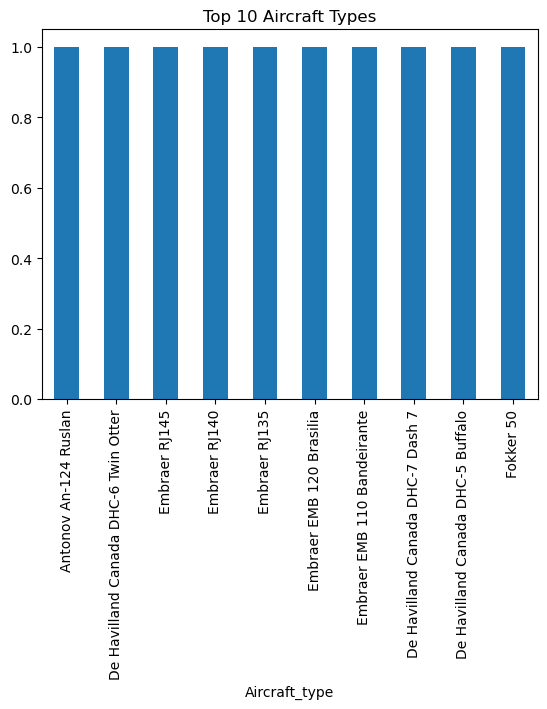

In [201]:
# plot a bar chart Frequency of top 10 Aircraft type
Aircraft_type_top_10 = ICAO_aircraft_type_designators['Aircraft_type'].value_counts().head(10)
Aircraft_type_top_10.plot(kind='bar', title = 'Top 10 Aircraft Types')
plt.show()

##### Que 1 : Which aircraft manufacturers have the highest number of crashes?

In [202]:
# Group by manufacturer based on Aircraft_Crashes dataset
crashes_by_manufacturer = Aircraft_Crashes.merge(Aircraft_type_list[['Model', 'Manufacturer']],
                                                  left_on='Aircraft_type', right_on='Model',
                                                  how='left')
crashes_by_manufacturer.head()

,Number_of_deaths,Incident_Date,Flight_name,Aircraft_type,Accident_details,Model,Manufacturer
0,279.0,2025-06-12 00:00:00,Air India Flight 171,Boeing 787-8 Dreamliner,"Air India Flight 171 flying from Ahmedabad, In...",Boeing 787-8 Dreamliner,Boeing
1,257.0,2018-04-11 00:00:00,Algerian Air Force Transport Aircraft,Ilyushin Il-76,Algerian Air Force transport aircraft crashed ...,Ilyushin Il-76,Ilyushin
2,224.0,2015-10-31 00:00:00,Metrojet Flight 9268,Airbus A321-231,Metrojet Flight 9268 crashed in the Sinai Peni...,Airbus A321-231,Airbus
3,298.0,2014-07-17 00:00:00,Malaysia Airlines Flight 17,Boeing 777-200ER,Malaysia Airlines Flight 17 flying from Amster...,Boeing 777-200ER,Boeing
4,239.0,2014-03-08 00:00:00,Malaysia Airlines Flight 370,Boeing 777-200ER,Malaysia Airlines Flight 370 flying from Kuala...,Boeing 777-200ER,Boeing


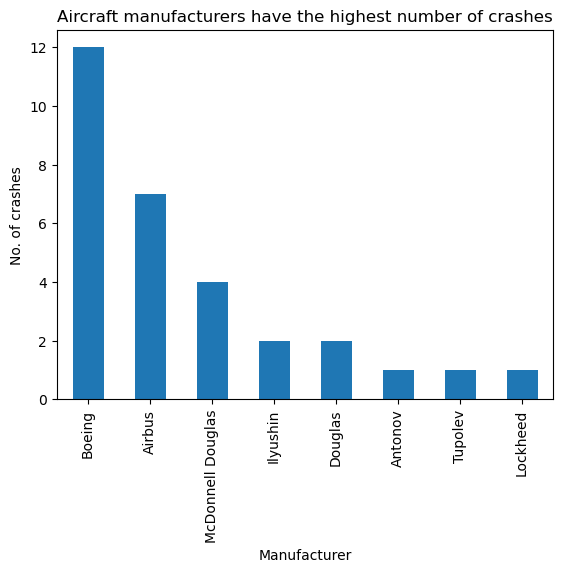

In [203]:
# Count Crashes by Manufacturer
highest_crashes = crashes_by_manufacturer['Manufacturer'].value_counts()

# plot graph now
highest_crashes.plot(kind = 'bar', title = 'Aircraft manufacturers have the highest number of crashes' )
plt.ylabel('No. of crashes')
plt.show()

Based on the available data, Boeing appears to have the highest number of aircraft crashes compared to other manufacturers.

Below are normal analysis on Aircraft_type_list Dataset 

In [204]:
# Descriptive stats
Aircraft_type_list[['Range_Km','Number_Built']].describe()

,Range_Km,Number_Built
count,29.000000,29.000000
mean,9163.103448,432.724138
std,2952.369936,599.274913
min,2500.000000,4.000000
25%,7300.000000,31.000000
50%,7540.000000,248.000000
75%,11070.000000,450.000000
max,14305.000000,2500.000000


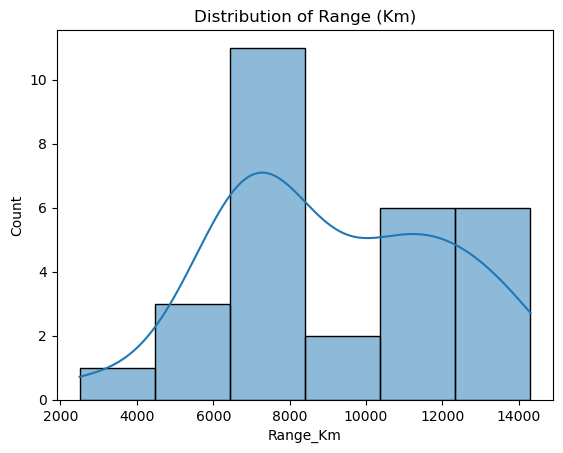

In [205]:
# plot histogram 
sns.histplot(Aircraft_type_list['Range_Km'], kde = True)
plt.title('Distribution of Range (Km)')
plt.show()

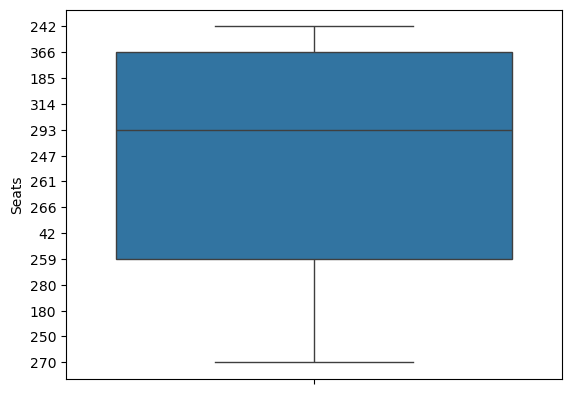

In [206]:
# Boxplot of seats
sns.boxplot(Aircraft_type_list['Seats'])
plt.show()

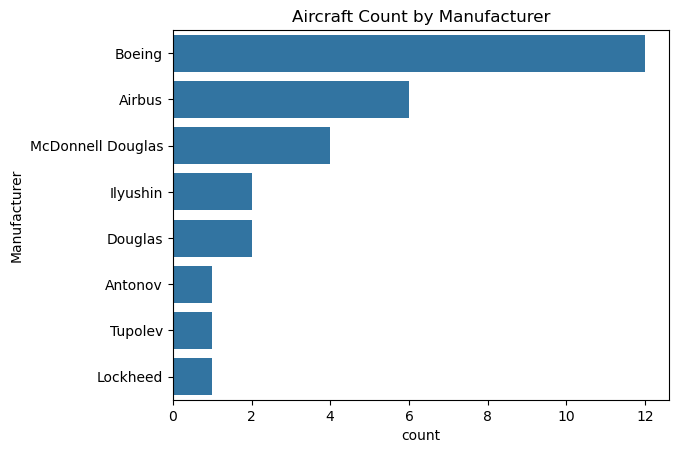

In [207]:
sns.countplot(y='Manufacturer', data=Aircraft_type_list, order=Aircraft_type_list['Manufacturer'].value_counts().index)
plt.title('Aircraft Count by Manufacturer')
plt.show()


##### Que 2 :What is the trend of aircraft crashes over time?


In [208]:
Aircraft_Crashes = Aircraft_Crashes.copy()

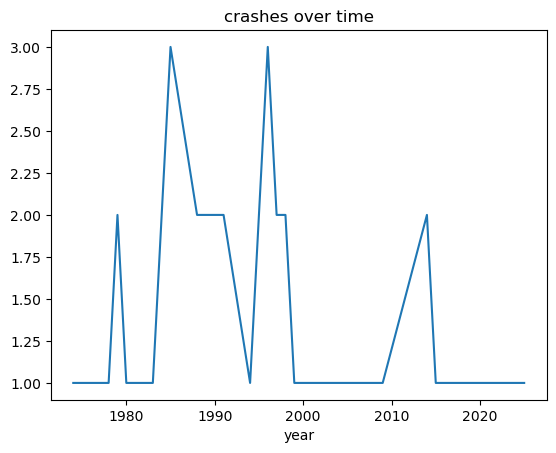

In [209]:
# convert date in datetime format 
Aircraft_Crashes['Incident_Date'] = pd.to_datetime(Aircraft_Crashes['Incident_Date'])
Aircraft_Crashes['Incident_Date'].head()

# Extract year from date 
Aircraft_Crashes['year'] = Aircraft_Crashes['Incident_Date'].dt.year
Aircraft_Crashes['year'].head()

Aircraft_Crashes['year'].value_counts().sort_index().plot(kind='line', title = 'crashes over time')
plt.show()

#### Que 3 : What are the top 10 deadliest aircraft crashes (by number of deaths)?

In [210]:
# Sort by number of deaths
top_10_deadliest = Aircraft_Crashes.sort_values(by='Number_of_deaths', ascending=False).head(10)

# Select important columns to view
top_10_deadliest[['Incident_Date', 'Flight_name', 'Aircraft_type', 'Number_of_deaths', ]]

,Incident_Date,Flight_name,Aircraft_type,Number_of_deaths
14,1996-11-12,Saudia Flight 763 /,Boeing 747 / Russian Ilyushin Il-76,349.0
31,1974-03-03,Turkish Airlines Flight 981,McDonnell Douglas DC-10,346.0
25,1985-06-23,Air India Flight 182,Boeing 747-237,329.0
27,1980-08-19,Saudi Arabian Airlines Flight 163,Lockheed L-1011,301.0
3,2014-07-17,Malaysia Airlines Flight 17,Boeing 777-200ER,298.0
22,1988-07-03,Iran Air Flight 655,Airbus A300-200,290.0
0,2025-06-12,Air India Flight 171,Boeing 787-8 Dreamliner,279.0
6,2003-02-19,Iranian Military Aircraft,Ilyushin Il-76,275.0
29,1979-05-25,American Airlines Flight 191,McDonnell Douglas DC-10-10,273.0
21,1988-12-21,Pan Am Flight 103,Boeing 747-121,270.0


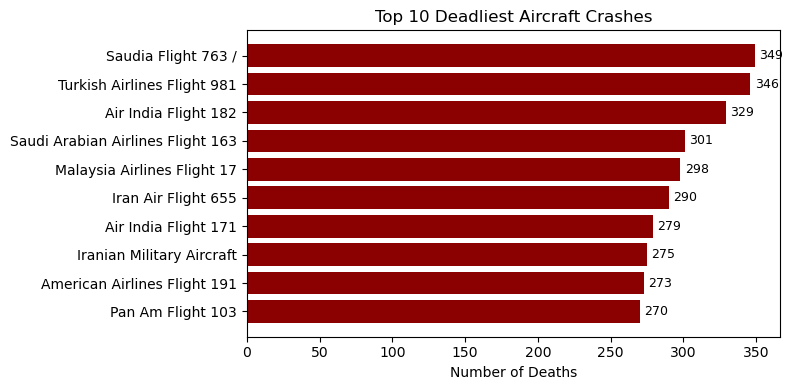

In [211]:
# Visualization
plt.figure(figsize=(8, 4))
bars = plt.barh(
    top_10_deadliest['Flight_name'],
    top_10_deadliest['Number_of_deaths'],
    color='darkred'
)

plt.xlabel("Number of Deaths")
plt.title("Top 10 Deadliest Aircraft Crashes")
plt.gca().invert_yaxis()  # To display the highest value on top
plt.tight_layout()

# Add number labels next to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 3,                # x-position (a bit to the right of bar end)
             bar.get_y() + bar.get_height()/2,  # y-position (centered on bar)
             str(int(width)),          # text (number of deaths)
             va='center', fontsize=9)

plt.show()


## Step 4: Bivariate/Multivariate Analysis

-  Explore relationships between variables.
-  Analyze the relationship between two or more variables .
-  Use correlation matrix, scatter plots, pair plots, groupby

#### Que 1 :  Is there any correlation between aircraft age and crashes?

To find the correlation between aircraft age and crashes, we first need to calculate the age of the aircraft at the time of the incident. This can be done by subtracting the aircraft's First Flight date from the Incident Date. Once we have the aircraft age, we can compare it with the number of deaths in each crash to identify whether older aircraft tend to result in more severe accidents.

In [212]:
Aircraft_Crashes = Aircraft_Crashes.copy()

In [213]:
# Ensure both dates are in datetime format 
Aircraft_Crashes['Incident_Date'] = pd.to_datetime(Aircraft_Crashes['Incident_Date'], errors = 'coerce')
Aircraft_type_list['First_Flight'] = pd.to_datetime(Aircraft_type_list['First_Flight'], errors = 'coerce')

C:\Users\hp\AppData\Local\Temp\ipykernel_22036\3063010623.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Aircraft_type_list['First_Flight'] = pd.to_datetime(Aircraft_type_list['First_Flight'], errors = 'coerce')


In [214]:
# Merge Two dataframes now 
crash_age = Aircraft_Crashes.merge(Aircraft_type_list[['Model','First_Flight']],
                                   left_on = 'Aircraft_type',
                                   right_on = 'Model',
                                   how = 'left')
crash_age.head()

,Number_of_deaths,Incident_Date,Flight_name,Aircraft_type,Accident_details,year,Model,First_Flight
0,279.0,2025-06-12,Air India Flight 171,Boeing 787-8 Dreamliner,"Air India Flight 171 flying from Ahmedabad, In...",2025,Boeing 787-8 Dreamliner,2009-12-15
1,257.0,2018-04-11,Algerian Air Force Transport Aircraft,Ilyushin Il-76,Algerian Air Force transport aircraft crashed ...,2018,Ilyushin Il-76,1971-03-25
2,224.0,2015-10-31,Metrojet Flight 9268,Airbus A321-231,Metrojet Flight 9268 crashed in the Sinai Peni...,2015,Airbus A321-231,1993-03-11
3,298.0,2014-07-17,Malaysia Airlines Flight 17,Boeing 777-200ER,Malaysia Airlines Flight 17 flying from Amster...,2014,Boeing 777-200ER,1996-10-07
4,239.0,2014-03-08,Malaysia Airlines Flight 370,Boeing 777-200ER,Malaysia Airlines Flight 370 flying from Kuala...,2014,Boeing 777-200ER,1996-10-07


In [215]:
# calculate age of aircraft
crash_age['Aircraft_age'] = ((crash_age['Incident_Date'] - crash_age['First_Flight']).dt.days // 365)


In [216]:
# Filter out invalid or missing ages
crash_age = crash_age[(crash_age['Aircraft_age'].notna()) & crash_age['Aircraft_age'] >=0 ]
crash_age.head()

,Number_of_deaths,Incident_Date,Flight_name,Aircraft_type,Accident_details,year,Model,First_Flight,Aircraft_age
0,279.0,2025-06-12,Air India Flight 171,Boeing 787-8 Dreamliner,"Air India Flight 171 flying from Ahmedabad, In...",2025,Boeing 787-8 Dreamliner,2009-12-15,15.0
1,257.0,2018-04-11,Algerian Air Force Transport Aircraft,Ilyushin Il-76,Algerian Air Force transport aircraft crashed ...,2018,Ilyushin Il-76,1971-03-25,47.0
2,224.0,2015-10-31,Metrojet Flight 9268,Airbus A321-231,Metrojet Flight 9268 crashed in the Sinai Peni...,2015,Airbus A321-231,1993-03-11,22.0
3,298.0,2014-07-17,Malaysia Airlines Flight 17,Boeing 777-200ER,Malaysia Airlines Flight 17 flying from Amster...,2014,Boeing 777-200ER,1996-10-07,17.0
4,239.0,2014-03-08,Malaysia Airlines Flight 370,Boeing 777-200ER,Malaysia Airlines Flight 370 flying from Kuala...,2014,Boeing 777-200ER,1996-10-07,17.0


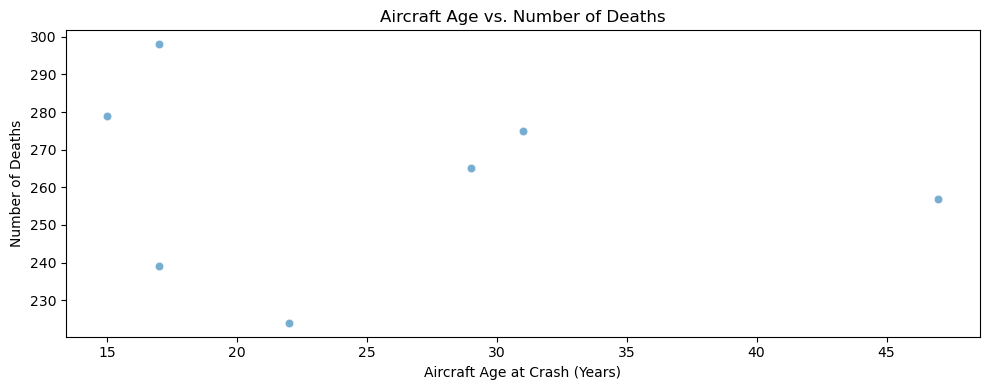

In [217]:
# Plot the Scatter Plot – Aircraft Age vs. Number of Deaths
plt.figure(figsize=(10,4))
sns.scatterplot(data = crash_age,
            x = 'Aircraft_age',
            y = 'Number_of_deaths',
            alpha = 0.6)
plt.title("Aircraft Age vs. Number of Deaths")
plt.xlabel("Aircraft Age at Crash (Years)")
plt.ylabel("Number of Deaths")
plt.grid=True
plt.tight_layout()
plt.show()


The scatter plot shows how the number of deaths varies with the age of the aircraft at the time of the crash. Most crashes cluster around aircraft aged 5–25 years, with a few severe incidents occurring even with younger or older aircraft.m

In [218]:
# Correlation matrix
Correlation_matrix = crash_age[['Aircraft_age','Number_of_deaths']].corr()
Correlation_matrix

,Aircraft_age,Number_of_deaths
Aircraft_age,1.000000,-0.106428
Number_of_deaths,-0.106428,1.000000


The correlation coefficient between aircraft age and number of deaths is approximately -0.106.
This indicates a very weak negative correlation, meaning that older aircraft are not significantly more likely to result in higher fatalities during crashes.

Therefore, we can conclude that aircraft age alone does not strongly influence the severity of crashes.

#### Que 2 : Do aircraft with more seats and longer range tend to have more  disaster?

Will required below fiedls and let's examine this with a pair plot
- Seats --> aircraft capacity
- Range_Km --> aircraft flying range
- Number_of_Deaths --> crash severity

A __pairplot__ from seaborn is a great way to explore relationships between multiple numerical variables — perfect for __multivariate analysis__.

In [219]:
# Merge datasets

merged_df = Aircraft_Crashes.merge(
    Aircraft_type_list[['Model', 'Seats', 'Range_Km']],
    left_on='Aircraft_type',
    right_on='Model',
    how='left'
)


In [220]:
# Convert 'Seats', 'Range_Km', 'Number_of_Deaths' to numeric
merged_df['Seats'] = pd.to_numeric(merged_df['Seats'], errors='coerce')
merged_df['Range_Km'] = pd.to_numeric(merged_df['Range_Km'], errors='coerce')
merged_df['Number_of_deaths'] = pd.to_numeric(merged_df['Number_of_deaths'], errors='coerce')

# Select relevant columns and drop missing values
pairplot_df = merged_df[['Seats', 'Range_Km', 'Number_of_deaths']].dropna()

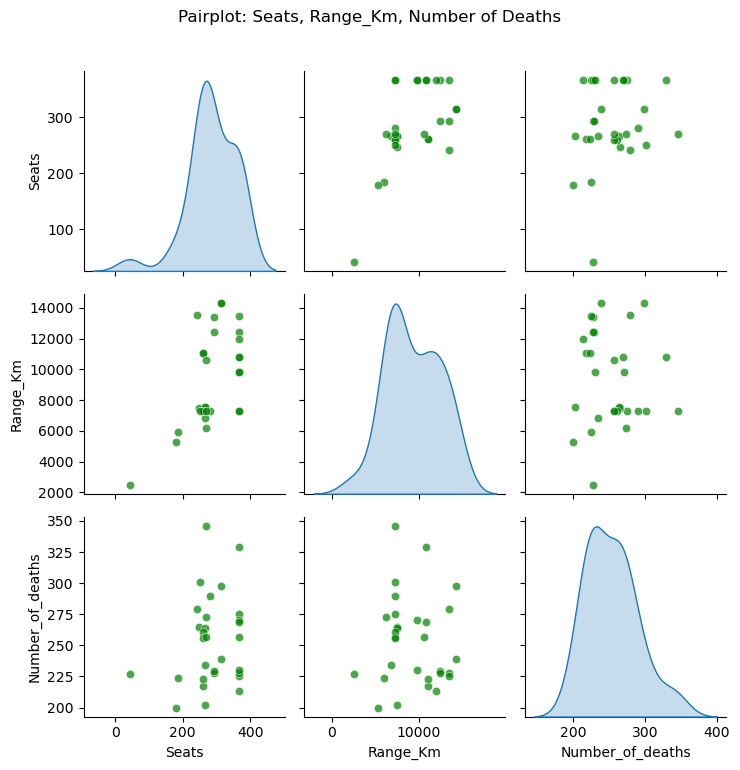

In [221]:
# Create pairplot
sns.pairplot(pairplot_df,
             diag_kind='kde',
             plot_kws={'alpha': 0.7, 'color': 'green'})

plt.suptitle("Pairplot: Seats, Range_Km, Number of Deaths", y=1.02)
plt.tight_layout()
plt.show()

__Seats vs. Number_of_Deaths__

The scatter plot shows a general positive trend — planes with more seats often have more deaths.
This is expected, since a plane with more passengers has the potential for a higher fatality count.

__Conclusion:__
There appears to be a weak to moderate positive relationship between aircraft capacity and crash severity.
Larger aircraft may lead to deadlier accidents due to more passengers onboard.

__Range_Km vs. Number_of_Deaths__

There's no clear trend.
Aircraft with a wide range of flight distance (from 5000 to 14000+ km) all have variable fatality counts.

__Conclusion:__
Flight range doesn’t strongly influence the number of deaths. Long-range and short-range aircraft both show similar crash outcomes in terms of fatalities.                                                                    

## Step 5: Feature Engineering 

Feature engineering help to create a new useful variables from existing ones.

#### Q1. Do certain aircraft have more fatal crashes than others (based on fatality ratio)?

Fatality Ratio = Number_of_deaths / Seats

In [222]:
# Merge Aircraft_Crashes with Aircraft_type_list 
Fatality_Ratio_merged = Aircraft_Crashes.merge(Aircraft_type_list,
                                       left_on = "Aircraft_type",
                                       right_on = "Model",
                                       how = "left")
Fatality_Ratio_merged.head()

,Number_of_deaths,Incident_Date,Flight_name,Aircraft_type,Accident_details,year,Model,Manufacturer,Type,Country,First_Flight,Entry_into_Service,Seats,Range_Km,Number_Built
0,279.0,2025-06-12,Air India Flight 171,Boeing 787-8 Dreamliner,"Air India Flight 171 flying from Ahmedabad, In...",2025,Boeing 787-8 Dreamliner,Boeing,Wide-body jet,USA,2009-12-15,26-10-2011,242,13530.0,1072.0
1,257.0,2018-04-11,Algerian Air Force Transport Aircraft,Ilyushin Il-76,Algerian Air Force transport aircraft crashed ...,2018,Ilyushin Il-76,Ilyushin,Cargo,Russia,1971-03-25,1974,366,7300.0,960.0
2,224.0,2015-10-31,Metrojet Flight 9268,Airbus A321-231,Metrojet Flight 9268 crashed in the Sinai Peni...,2015,Airbus A321-231,Airbus,Narrow-body jet,Multinational,1993-03-11,1994,185,5950.0,2500.0
3,298.0,2014-07-17,Malaysia Airlines Flight 17,Boeing 777-200ER,Malaysia Airlines Flight 17 flying from Amster...,2014,Boeing 777-200ER,Boeing,Wide-body jet,USA,1996-10-07,1997,314,14305.0,422.0
4,239.0,2014-03-08,Malaysia Airlines Flight 370,Boeing 777-200ER,Malaysia Airlines Flight 370 flying from Kuala...,2014,Boeing 777-200ER,Boeing,Wide-body jet,USA,1996-10-07,1997,314,14305.0,422.0


As few columns were in float hence we converted them into integer 

In [223]:
Fatality_Ratio_merged['Number_of_deaths'] = Fatality_Ratio_merged['Number_of_deaths'].astype('int32')

In [224]:
Fatality_Ratio_merged['Number_of_deaths'].dtype

dtype('int32')

In [225]:
Fatality_Ratio_merged['Seats'].isnull().sum()

1

In [226]:
Fatality_Ratio_merged[Fatality_Ratio_merged['Seats'].isnull()]

,Number_of_deaths,Incident_Date,Flight_name,Aircraft_type,Accident_details,year,Model,Manufacturer,Type,Country,First_Flight,Entry_into_Service,Seats,Range_Km,Number_Built
14,349,1996-11-12,Saudia Flight 763 /,Boeing 747 / Russian Ilyushin Il-76,Saudia Flight 763 and Kazakhstan Airlines Flig...,1996,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [227]:
Fatality_Ratio_merged['Seats'] = Fatality_Ratio_merged['Seats'].fillna(Fatality_Ratio_merged['Seats'].mode()[0])


In [228]:
Fatality_Ratio_merged['Seats'] = Fatality_Ratio_merged['Seats'].astype('int32')

In [229]:
# Create Fatality_Ratio = Number_of_deaths / Seats
Fatality_Ratio_merged['Fatality_Ratio'] = Fatality_Ratio_merged['Number_of_deaths'] / Fatality_Ratio_merged['Seats']

In [230]:
# Group by Aircraft model and get average fatality ratio
fatal_crashes = Fatality_Ratio_merged.groupby('Aircraft_type')['Fatality_Ratio'].mean().sort_values(ascending=False)

In [231]:
fatal_crashes.head()

Aircraft_type
Antonov An-32B             5.404762
McDonnell Douglas DC-10    1.281481
Airbus A321-231            1.210811
Lockheed L-1011            1.204000
Boeing 787-8 Dreamliner    1.152893
Name: Fatality_Ratio, dtype: float64

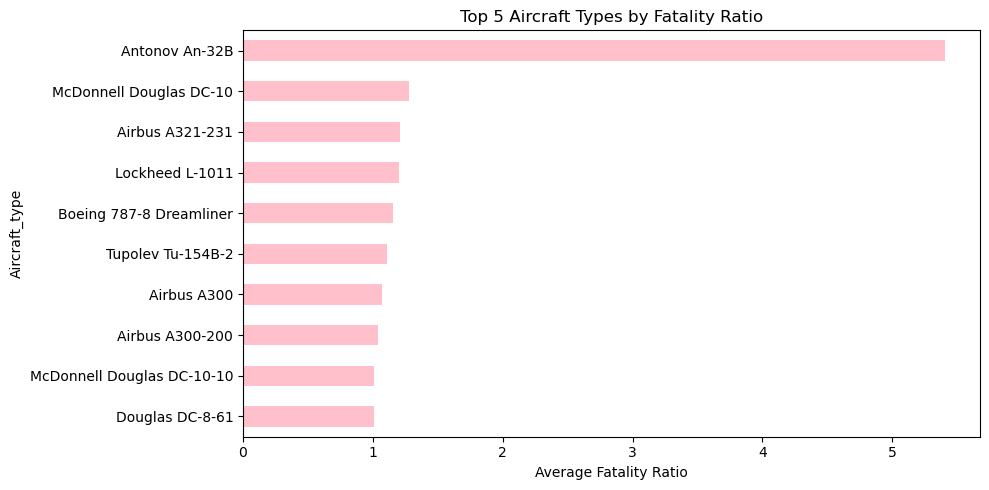

In [232]:
# Plotting the Series
plt.figure(figsize=(10, 5))
fatal_crashes.head(10).sort_values().plot(kind='barh', color='pink')

plt.xlabel("Average Fatality Ratio")
plt.title("Top 5 Aircraft Types by Fatality Ratio")
plt.tight_layout()
plt.show()


The Antonov An-32B stands out with the highest average fatality ratio (~5.4), significantly higher than all other aircraft. This suggests that crashes involving this aircraft type tend to be far more deadly on average.

## Step 6: Insights & Interpretation

#### Q1: Is there a particular month or season when most crashes occur?			

In [238]:
# Convert Incident_Date column to datetime format
Aircraft_Crashes['Incident_Date'] = pd.to_datetime(Aircraft_Crashes['Incident_Date'], errors='coerce')

In [244]:
# Extract month from date 
Aircraft_Crashes['month'] = Aircraft_Crashes['Incident_Date'].dt.month_name()

In [258]:
# Create season from months 
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Autumn'

In [260]:
# Add season
Aircraft_Crashes['Season'] = Aircraft_Crashes['Incident_Date'].dt.month.apply(get_season)

In [274]:
#  Count crashes by Month and Season
monthly_counts = Aircraft_Crashes['month'].value_counts().sort_index()
monthly_counts

month
April        2
August       2
December     2
February     2
January      2
July         5
June         3
March        2
May          3
November     3
October      2
September    3
Name: count, dtype: int64

In [266]:
season_counts =  Aircraft_Crashes['Season'].value_counts()
season_counts

Season
Summer    10
Autumn     8
Spring     7
Winter     6
Name: count, dtype: int64

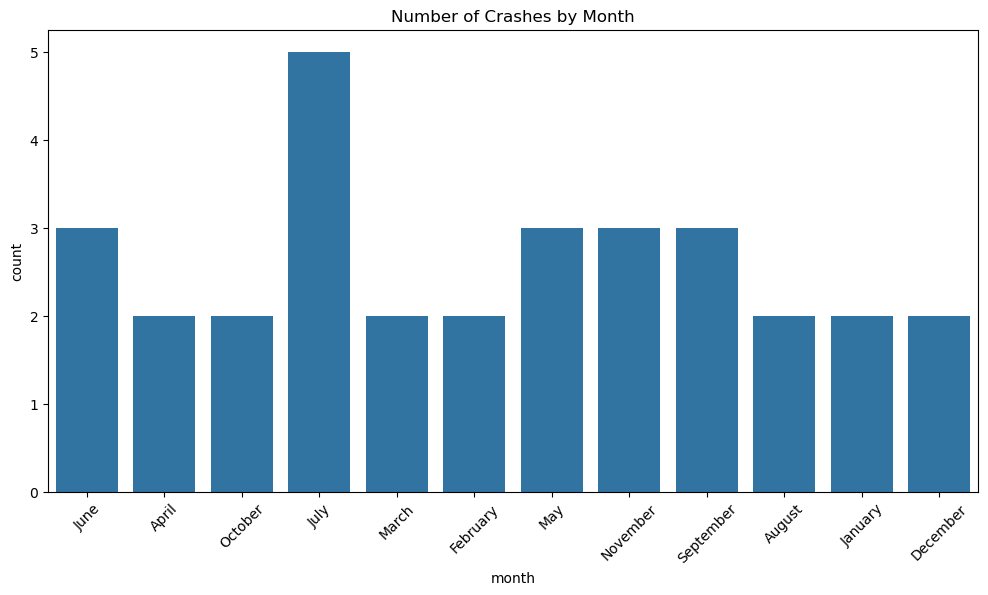

In [277]:
# Visualize 
# Monthly crashes
plt.figure(figsize=(12,6))
sns.countplot(x='month', data=Aircraft_Crashes)
plt.xticks(rotation=45)
plt.title('Number of Crashes by Month')
plt.show()


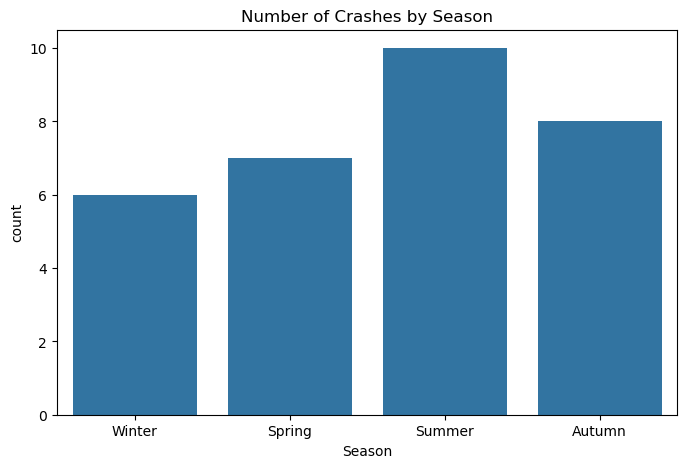

In [273]:

# Seasonal crashes
plt.figure(figsize=(8,5))
sns.countplot(x='Season', data=Aircraft_Crashes, order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title('Number of Crashes by Season')
plt.show()

From the above visualizations, we can conclude that most crashes occur in the month of July, which falls in the summer season.

#### Q1: Has aircraft safety improved over the decades

In [282]:
# Extract year from Incident_Date
Aircraft_Crashes['Incident_Year']  = Aircraft_Crashes['Incident_Date'].dt.year

In [288]:
# Aggregate total deaths per year
deaths_per_year = Aircraft_Crashes.groupby('Incident_Year')['Number_of_deaths'].sum().reset_index()
deaths_per_year

,Incident_Year,Number_of_deaths
0,1974,346.0
1,1978,213.0
2,1979,530.0
3,1980,301.0
4,1983,269.0
5,1985,785.0
6,1988,560.0
7,1991,484.0
8,1994,264.0
9,1996,806.0


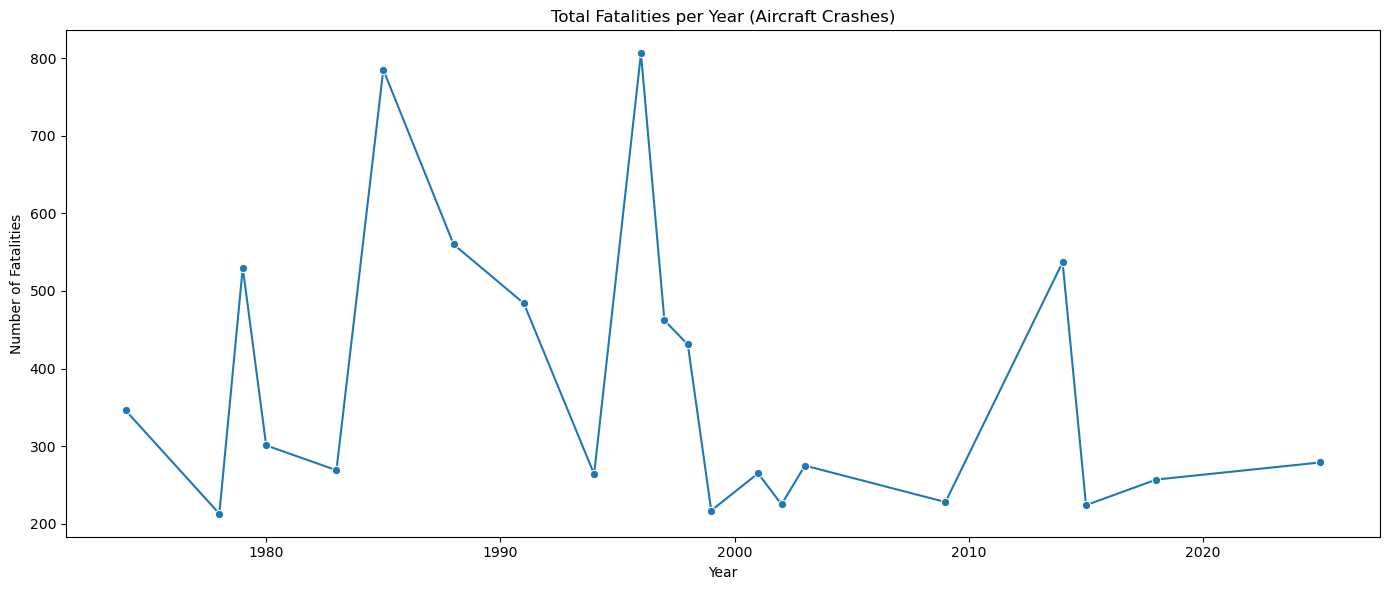

In [292]:
# Plot the trend of fatalities over the years


plt.figure(figsize=(14,6))
sns.lineplot(data=deaths_per_year, x='Incident_Year', y='Number_of_deaths', marker='o')
plt.title('Total Fatalities per Year (Aircraft Crashes)')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.tight_layout()
plt.show()


Yes, aircraft safety appears to have improved over the decades.

## CONCLUSION :
This project aimed to analyze aircraft crashes over time using historical aviation incident data. By applying data analysis techniques with Pandas, NumPy, Matplotlib, and Seaborn, extracted meaningful insights related to crash trends, fatalities, and safety improvements.
A key finding was the significant decline in aircraft-related fatalities over the decades, especially after the 2000s.
Additional analyses also highlighted trends in crash frequency, causes, aircraft types involved, and geographical patterns, allowing for a comprehensive view of aviation safety over time.
Aircraft safety has substantially improved over the decades, making modern air travel one of the safest modes of transportation. The declining trend in fatalities and crashes is a positive indicator of progress in the aviation industry.

# __NOTE__ :

Although the dataset is based on real-life aircraft crash incidents, the following data cleaning and transformation steps were performed purely for exploratory data analysis (EDA) purposes.

No new incident data or assumptions were added or imputed to preserve the integrity of the original records. However, for the sake of better analysis and visualization, minor adjustments—such as working with seat numbers, aircraft codes, or text formatting—were applied to enhance clarity and consistency in the dataset.

In cases where important date-related fields (such as Incident_Date or First_Flight) were missing, efforts were made to research accurate values from reliable online sources.

For the purpose of this Exploratory Data Analysis (EDA) project only, The missing dates were then imputed based on this verified external information to enhance the completeness of the dataset without compromising factual integrity.

This was done to improve the quality of the analysis and visualization.

No assumptions or artificial values were used — only well-researched and cross-verified information was added where applicable.
